<a href="https://colab.research.google.com/github/OracyC/Capstone-HMDA/blob/master/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Read files

In [36]:
files = "https://github.com/OracyC/Capstone-HMDA/raw/master/hmda.zip" 
!rm -rf * && pip install git+https://github.com/data-8/Gofer-Grader && wget $files && unzip -o hmda.zip

  Cloning https://github.com/data-8/Gofer-Grader to /tmp/pip-req-build-stdsqobe
  Running command git clone -q https://github.com/data-8/Gofer-Grader /tmp/pip-req-build-stdsqobe
  Created wheel for gofer-grader: filename=gofer_grader-1.0.9-cp36-none-any.whl size=10171 sha256=dcefd29a23f338925b0a5ead4611caa0d6176228f1506923248d63ee2885e8c4
  Stored in directory: /tmp/pip-ephem-wheel-cache-k1n1r0yh/wheels/9e/62/24/8563ae039051d6ba979557d1766bfebbda5dd08f8572e3e35d
Successfully built gofer-grader
--2020-02-09 20:01:23--  https://github.com/OracyC/Capstone-HMDA/raw/master/hmda.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/OracyC/Capstone-HMDA/master/hmda.zip [following]
--2020-02-09 20:01:24--  https://raw.githubusercontent.com/OracyC/Capstone-HMDA/master/hmda.zip
Resolving raw.githubusercontent.com (raw.githubuserconten

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
hmda2017 = pd.read_csv('hmda_2017_ny_all-records_labels.csv',low_memory=False)
hmda2016 = pd.read_csv('hmda_2016_ny_all-records_labels.csv',low_memory=False)
hmda = pd.concat( [hmda2017, hmda2016], axis=0 )
hmda.head()

,as_of_year,respondent_id,agency_name,agency_abbr,agency_code,loan_type_name,loan_type,property_type_name,property_type,loan_purpose_name,loan_purpose,owner_occupancy_name,owner_occupancy,loan_amount_000s,preapproval_name,preapproval,action_taken_name,action_taken,msamd_name,msamd,state_name,state_abbr,state_code,county_name,county_code,census_tract_number,applicant_ethnicity_name,applicant_ethnicity,co_applicant_ethnicity_name,co_applicant_ethnicity,applicant_race_name_1,applicant_race_1,applicant_race_name_2,applicant_race_2,applicant_race_name_3,applicant_race_3,applicant_race_name_4,applicant_race_4,applicant_race_name_5,applicant_race_5,co_applicant_race_name_1,co_applicant_race_1,co_applicant_race_name_2,co_applicant_race_2,co_applicant_race_name_3,co_applicant_race_3,co_applicant_race_name_4,co_applicant_race_4,co_applicant_race_name_5,co_applicant_race_5,applicant_sex_name,applicant_sex,co_applicant_sex_name,co_applicant_sex,applicant_income_000s,purchaser_type_name,purchaser_type,denial_reason_name_1,denial_reason_1,denial_reason_name_2,denial_reason_2,denial_reason_name_3,denial_reason_3,rate_spread,hoepa_status_name,hoepa_status,lien_status_name,lien_status,edit_status_name,edit_status,sequence_number,population,minority_population,hud_median_family_income,tract_to_msamd_income,number_of_owner_occupied_units,number_of_1_to_4_family_units,application_date_indicator
0,2017,0003303298,Consumer Financial Protection Bureau,CFPB,9,Conventional,1,One-to-four family dwelling (other than manufa...,1,Home purchase,1,Owner-occupied as a principal dwelling,1,705,Not applicable,3,Loan originated,1,"New York, Jersey City, White Plains - NY, NJ",35614.0,New York,NY,36,New York County,61.0,146.02,"Information not provided by applicant in mail,...",3,No co-applicant,5,"Information not provided by applicant in mail,...",6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No co-applicant,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Information not provided by applicant in mail,...",3,No co-applicant,5,462.0,Loan was not originated or was not sold in cal...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not a HOEPA loan,2,Secured by a first lien,1,NaN,NaN,NaN,7748.0,16.330000,73700.0,291.769989,1232.0,78.0,NaN
1,2017,75-2921540,Department of Housing and Urban Development,HUD,7,Conventional,1,One-to-four family dwelling (other than manufa...,1,Refinancing,3,Owner-occupied as a principal dwelling,1,112,Not applicable,3,Loan originated,1,NaN,NaN,New York,NY,36,Clinton County,19.0,1010.00,Not Hispanic or Latino,2,No co-applicant,5,"Information not provided by applicant in mail,...",6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No co-applicant,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,2,No co-applicant,5,96.0,Freddie Mac (FHLMC),3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not a HOEPA loan,2,Secured by a first lien,1,NaN,NaN,NaN,4182.0,9.520000,62500.0,164.960007,1068.0,1492.0,NaN
2,2017,11-3019327,Department of Housing and Urban Development,HUD,7,Conventional,1,One-to-four family dwelling (other than manufa...,1,Home purchase,1,Not owner-occupied as a principal dwelling,2,356,Preapproval was not requested,2,Application denied by financial institution,3,"New York, Jersey City, White Plains - NY, NJ",35614.0,New York,NY,36,Kings County,47.0,626.00,Not Hispanic or Latino,2,No co-applicant,5,White,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No co-applicant,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male,1,No co-applicant,5,115.0,Loan was not originated or was not sold in cal...,0,Other,9.0,NaN,NaN,NaN,NaN,NaN,Not a HOEPA loan,2,Secured by a first lien,1,NaN,NaN,NaN,2670.0,45.540001,73700.0,81.410004,665.0,682.0,NaN
3,2017,20-0193314,Federal Deposit Insurance Corporation,FDIC,3,Conventional,1,Manufactured housing,2,Home purchase,1,Owner-occupied as a principal dwelling,1,58,Not applicable,3,Application denied by financial institution,3,"Utica, Rome - NY",46540.0,New York,NY,36,Oneida County,65.0,230.00,"Information not provided by applicant in mail,...",3,No co-applicant,5,White,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No co-applicant,8,NaN,

In [0]:
hmda_sub = hmda.iloc[:,70:77]

In [0]:
hmda_drop = hmda.dropna(axis=1)
hmda = pd.concat([hmda_drop,hmda_sub],axis=1)

In [51]:
hmda.head()

,as_of_year,respondent_id,agency_name,agency_abbr,agency_code,loan_type_name,loan_type,property_type_name,property_type,loan_purpose_name,loan_purpose,owner_occupancy_name,owner_occupancy,loan_amount_000s,preapproval_name,preapproval,action_taken_name,action_taken,state_name,state_abbr,state_code,applicant_ethnicity_name,applicant_ethnicity,co_applicant_ethnicity_name,co_applicant_ethnicity,applicant_race_name_1,applicant_race_1,co_applicant_race_name_1,co_applicant_race_1,applicant_sex_name,applicant_sex,co_applicant_sex_name,co_applicant_sex,purchaser_type_name,purchaser_type,hoepa_status_name,hoepa_status,lien_status_name,lien_status,sequence_number,population,minority_population,hud_median_family_income,tract_to_msamd_income,number_of_owner_occupied_units,number_of_1_to_4_family_units
0,2017,0003303298,Consumer Financial Protection Bureau,CFPB,9,Conventional,1,One-to-four family dwelling (other than manufa...,1,Home purchase,1,Owner-occupied as a principal dwelling,1,705,Not applicable,3,Loan originated,1,New York,NY,36,"Information not provided by applicant in mail,...",3,No co-applicant,5,"Information not provided by applicant in mail,...",6,No co-applicant,8,"Information not provided by applicant in mail,...",3,No co-applicant,5,Loan was not originated or was not sold in cal...,0,Not a HOEPA loan,2,Secured by a first lien,1,NaN,7748.0,16.330000,73700.0,291.769989,1232.0,78.0
1,2017,75-2921540,Department of Housing and Urban Development,HUD,7,Conventional,1,One-to-four family dwelling (other than manufa...,1,Refinancing,3,Owner-occupied as a principal dwelling,1,112,Not applicable,3,Loan originated,1,New York,NY,36,Not Hispanic or Latino,2,No co-applicant,5,"Information not provided by applicant in mail,...",6,No co-applicant,8,Female,2,No co-applicant,5,Freddie Mac (FHLMC),3,Not a HOEPA loan,2,Secured by a first lien,1,NaN,4182.0,9.520000,62500.0,164.960007,1068.0,1492.0
2,2017,11-3019327,Department of Housing and Urban Development,HUD,7,Conventional,1,One-to-four family dwelling (other than manufa...,1,Home purchase,1,Not owner-occupied as a principal dwelling,2,356,Preapproval was not requested,2,Application denied by financial institution,3,New York,NY,36,Not Hispanic or Latino,2,No co-applicant,5,White,5,No co-applicant,8,Male,1,No co-applicant,5,Loan was not originated or was not sold in cal...,0,Not a HOEPA loan,2,Secured by a first lien,1,NaN,2670.0,45.540001,73700.0,81.410004,665.0,682.0
3,2017,20-0193314,Federal Deposit Insurance Corporation,FDIC,3,Conventional,1,Manufactured housing,2,Home purchase,1,Owner-occupied as a principal dwelling,1,58,Not applicable,3,Application denied by financial institution,3,New York,NY,36,"Information not provided by applicant in mail,...",3,No co-applicant,5,White,5,No co-applicant,8,Female,2,No co-applicant,5,Loan was not originated or was not sold in cal...,0,Not a HOEPA loan,2,Secured by a first lien,1,NaN,6135.0,9.050000,62100.0,134.279999,2143.0,2490.0
4,2017,0000613307,Consumer Financial Protection Bureau,CFPB,9,Conventional,1,One-to-four family dwelling (other than manufa...,1,Refinancing,3,Owner-occupied as a principal dwelling,1,800,Not applicable,3,Loan originated,1,New York,NY,36,"Information not provided by applicant in mail,...",3,"Information not provided by applicant in mail,...",3,"Information not provided by applicant in mail,...",6,"Information not provided by applicant in mail,...",6,"Information not provided by applicant in mail,...",3,"Information not provided by applicant in mail,...",3,Loan was not originated or was not sold in cal...,0,Not a HOEPA loan,2,Secured by a first lien,1,NaN,3755.0,62.639999,73700.0,132.720001,623.0,742.0


In [52]:
hmda.describe()

,as_of_year,agency_code,loan_type,property_type,loan_purpose,owner_occupancy,loan_amount_000s,preapproval,action_taken,state_code,applicant_ethnicity,co_applicant_ethnicity,applicant_race_1,co_applicant_race_1,applicant_sex,co_applicant_sex,purchaser_type,hoepa_status,lien_status,sequence_number,population,minority_population,hud_median_family_income,tract_to_msamd_income,number_of_owner_occupied_units,number_of_1_to_4_family_units
count,924215.000000,924215.000000,924215.000000,924215.000000,924215.000000,924215.000000,9.242150e+05,924215.000000,924215.000000,924215.0,924215.000000,924215.000000,924215.000000,924215.000000,924215.000000,924215.000000,924215.000000,924215.000000,924215.000000,4.773130e+05,921532.000000,921531.000000,921583.000000,921451.000000,921137.000000,921063.000000
mean,2016.483548,6.871719,1.286309,1.036303,1.862141,1.118121,3.441868e+02,2.825365,2.514380,36.0,2.259858,3.803677,4.964376,6.699816,1.735377,3.717007,1.447374,1.999878,1.531660,1.110000e+05,4770.126112,30.199906,78961.811362,116.252757,1207.542102,1534.852759
std,0.499730,2.330222,0.574757,0.232091,0.937849,0.358155,3.833694e+03,0.438448,1.836406,0.0,0.731292,1.415138,1.235478,1.645715,0.985142,1.534892,2.391099,0.011057,1.072311,2.173156e+05,1889.896795,29.364579,16185.852840,51.324423,604.841826,785.944417
min,2016.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000,36.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000e+00,0.000000,0.000000,57900.000000,0.000000,0.000000,0.000000
25%,2016.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.080000e+02,3.000000,1.000000,36.0,2.000000,2.000000,5.000000,5.000000,1.000000,2.000000,0.000000,2.000000,1.000000,1.409000e+03,3456.000000,8.050000,68200.000000,87.209999,741.000000,998.000000
50%,2016.000000,7.000000,1.000000,1.000000,1.000000,1.000000,2.160000e+02,3.000000,1.000000,36.0,2.000000,5.000000,5.000000,8.000000,1.000000,5.000000,0.000000,2.000000,1.000000,1.506000e+04,4575.000000,18.110001,72600.000000,106.529999,1193.000000,1538.000000
75%,2017.000000,9.000000,1.000000,1.000000,3.000000,1.000000,3.770000e+02,3.000000,4.000000,36.0,2.000000,5.000000,5.000000,8.000000,2.000000,5.000000,2.000000,2.000000,1.000000,1.045270e+05,5938.000000,40.930000,83100.000000,130.770004,1631.000000,2029.000000
max,2017.000000,9.000000,4.000000,3.000000,3.000000,3.000000,3.400000e+06,3.000000,8.000000,36.0,4.000000,5.000000,7.000000,8.000000,4.000000,5.000000,9.000000,2.000000,4.000000,1.241797e+06,28926.000000,100.000000,110800.000000,367.609985,6454.000000,6541.000000


#Feature Engineering

In [0]:
# delete all rows with column 'action_taken' is not 1 and 3
indexNames = hmda[ (hmda['action_taken'] != 1) & (hmda['action_taken'] != 3) ].index
hmda.drop(indexNames , inplace=True)
# assign 1 to approved action and 0 to denied action
hmda["action"] = 0
hmda.loc[hmda["action_taken"]==1,"action"] = 1

In [0]:
# delete all rows with column 'applicant_sex' is not 1 and 2, which has missing information
indexSex = hmda[ (hmda['applicant_sex'] != 1) & (hmda['applicant_sex'] != 2) ].index
hmda.drop(indexSex , inplace=True)

In [0]:
# delete all rows with column 'loan_purpose' is 1. We only analyze borrowers who purchase the house
indexPurchase = hmda[ (hmda['loan_purpose'] != 1) ].index
hmda.drop(indexPurchase , inplace=True)

In [0]:
# delete all rows with column 'applicant_ethnicity' is not 1 and 2, which has missing information
indexAppEth = hmda[ (hmda['applicant_ethnicity'] != 1) & (hmda['applicant_ethnicity'] != 2) ].index
hmda.drop(indexAppEth , inplace=True)
# delete all rows with column 'co_applicant_ethnicity' is not 1 and 2, which has missing information
indexCoAppEth = hmda[ (hmda['co_applicant_ethnicity'] != 1) & (hmda['co_applicant_ethnicity'] != 2) ].index
hmda.drop(indexCoAppEth , inplace=True)
# delete all rows with column 'applicant_race_1' is not 1 and 2, which has missing information
indexAppRace = hmda[ (hmda['applicant_race_1'] != 1) & (hmda['applicant_race_1'] != 2) & (hmda['applicant_race_1'] != 3) & (hmda['applicant_race_1'] != 4) & (hmda['applicant_race_1'] != 5) ].index
hmda.drop(indexAppRace , inplace=True)
# delete all rows with column 'co_applicant_race_1' is not 1 and 2, which has missing information
indexCoAppEth = hmda[ (hmda['co_applicant_race_1'] != 1) & (hmda['co_applicant_race_1'] != 2) & (hmda['co_applicant_race_1'] != 3) & (hmda['co_applicant_race_1'] != 4) & (hmda['co_applicant_race_1'] != 5) ].index
hmda.drop(indexCoAppEth , inplace=True)

In [0]:
hmda["minority"] = hmda["population"] * hmda["minority_population"] / 100

#EDA

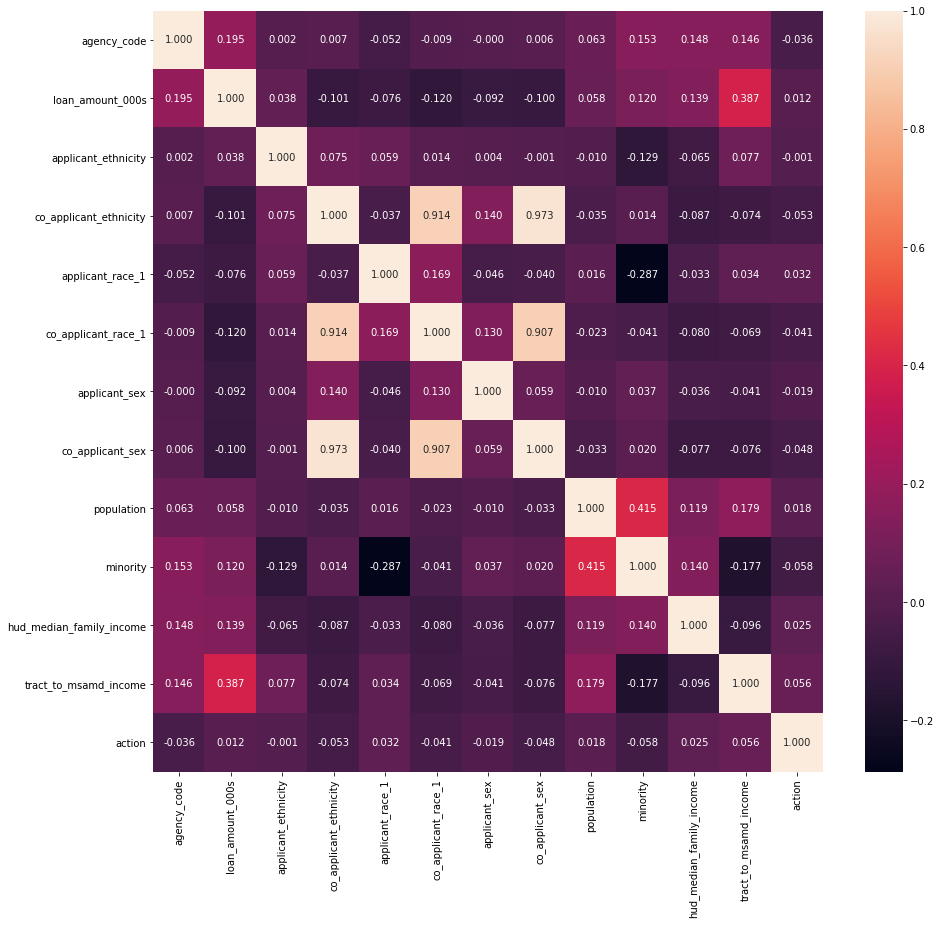

In [68]:
cor_features = hmda[['agency_code', 'loan_amount_000s', 'applicant_ethnicity', 'co_applicant_ethnicity', 'applicant_race_1','co_applicant_race_1',
            'applicant_sex', 'co_applicant_sex', 'population','minority','hud_median_family_income','tract_to_msamd_income','action']]
f,ax = plt.subplots(figsize=(15, 14))
sns.heatmap(cor_features.corr(), annot=True, linewidths=0, fmt= '.3f',ax=ax)
plt.show()

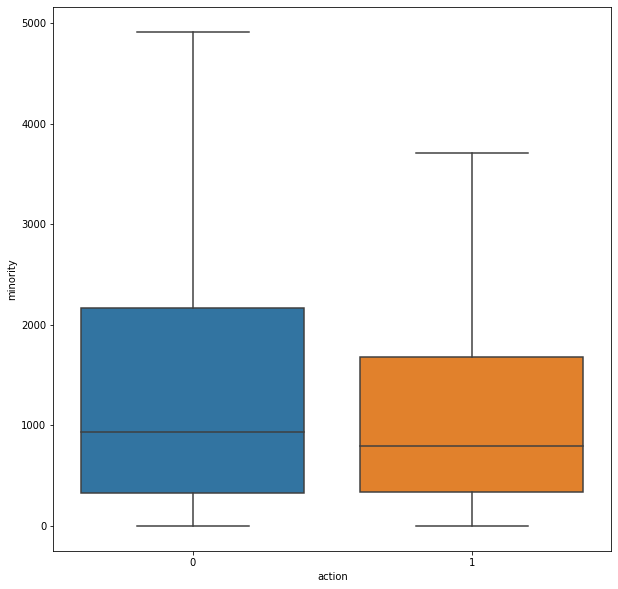

In [64]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.boxplot(ax=ax, x=hmda['action'], y=hmda['minority'],showfliers=False)

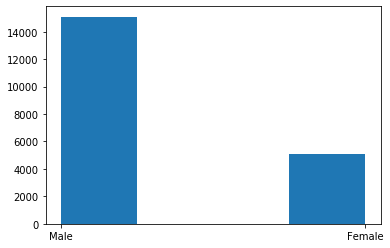

In [135]:
plt.hist(hmda['applicant_sex_name'],bins=4);

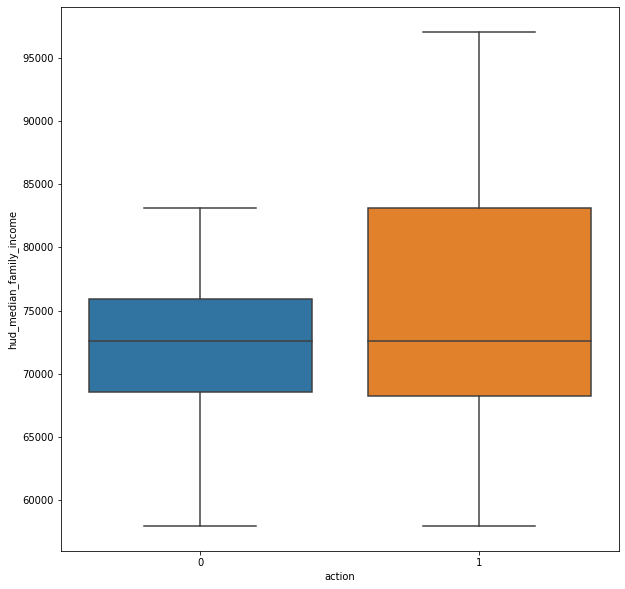

In [109]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.boxplot(ax=ax, x=hmda['action'], y=hmda['hud_median_family_income'],showfliers=False)

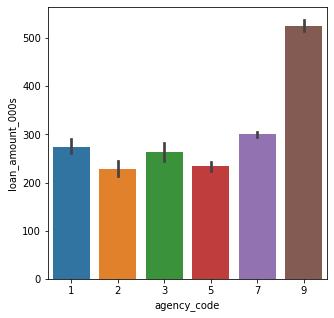

In [145]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.barplot(ax=ax, x=hmda['agency_code'], y=hmda['loan_amount_000s'])

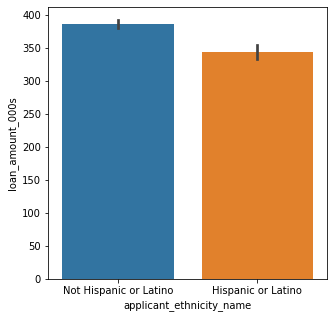

In [143]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.barplot(ax=ax, x=hmda['applicant_ethnicity_name'], y=hmda['loan_amount_000s'])

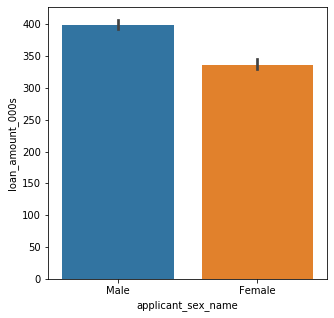

In [147]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.barplot(ax=ax, x=hmda['applicant_sex_name'], y=hmda['loan_amount_000s'])

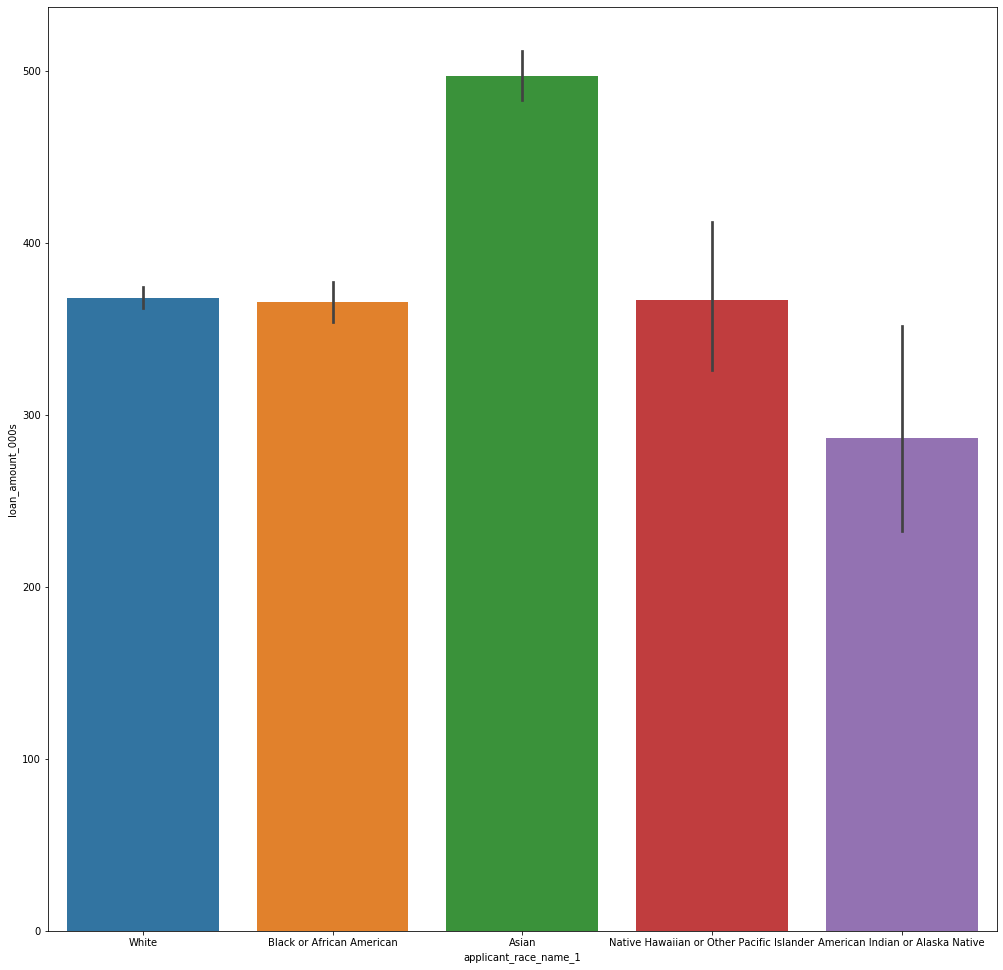

In [152]:
fig, ax = plt.subplots(figsize=(17, 17))
sns.barplot(ax=ax, x=hmda['applicant_race_name_1'], y=hmda['loan_amount_000s'])

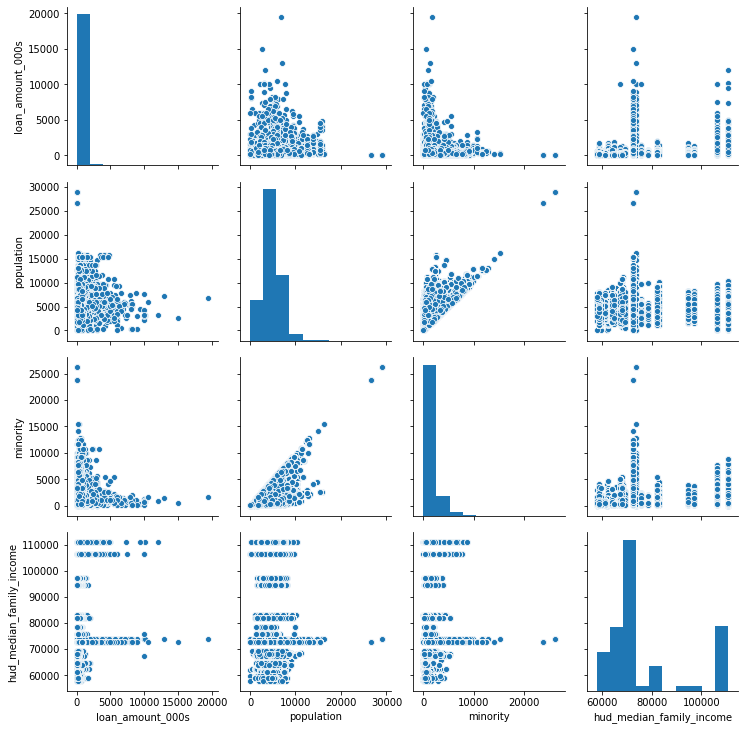

In [129]:
cor_featuresplot = cor_features.loc[:,('loan_amount_000s','population','minority','hud_median_family_income')]
sns.pairplot(cor_featuresplot)

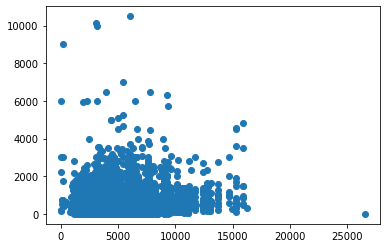

In [146]:
plt.scatter(hmda['population'], hmda['loan_amount_000s'])

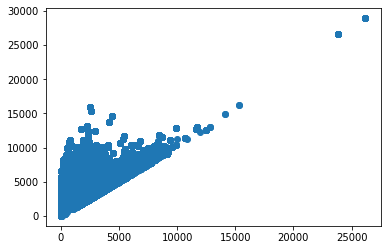

In [73]:
plt.scatter(hmda['minority'], hmda['population'])

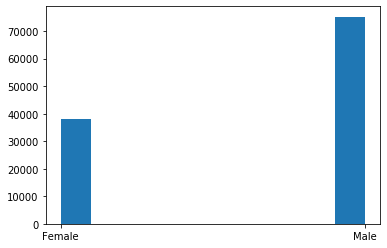

In [82]:
plt.hist(hmda['applicant_sex_name']);

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


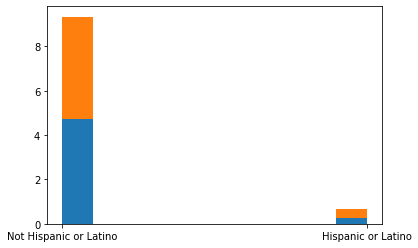

In [98]:
plt.hist([hmda['applicant_ethnicity_name'],hmda['co_applicant_ethnicity_name']],bins=10, normed=True, label=['applicant', 'co-applicant'], histtype='bar', stacked=True);